In [1]:
import sympy as sp
import math
import numpy as np
import matplotlib.pyplot as plt

# Chapter 1

## Question 1
What is the percentage error in the approximation compared to the true value of 9^1/3 if x0 =8

In [2]:
# Define the function and the derivative
x = sp.symbols('x')
f = x**(1/3)
f_prime = sp.diff(f, x)

# Define the point of approximation
x0 = 8

# True value of 9^(1/3)
true_value = 9**(1/3)

# Calculate f(8) and f'(8)
f_at_x0 = f.subs(x, x0)
f_prime_at_x0 = f_prime.subs(x, x0)

# Linear approximation using Taylor series
approximation = f_at_x0 + f_prime_at_x0 * (9 - x0)

# Calculate the percentage error
percentage_error = abs(true_value - approximation) / true_value * 100

# Print the results
print(f"True value of 9^(1/3): {true_value:.4f}")
print(f"Linear approximation: {approximation:.4f}")
print(f"Percentage error: {percentage_error:.4f}%")


True value of 9^(1/3): 2.0801
Linear approximation: 2.0833
Percentage error: 0.1562%


## Question 2
The linear approximation for the function f(x) = x² about the point x = 1 results. (consider a truncated Taylor series)


In [3]:
# Define the function and point
x = sp.symbols('x')
f = x**2
a = 1

# Compute the Taylor series expansion
taylor_approx = f.subs(x, a) + sp.diff(f, x).subs(x, a) * (x - a)

# Display the result
print(f"Linear approximation: {sp.simplify(taylor_approx)}")


Linear approximation: 2*x - 1


## Question 3
The remainder term in calculating the first derivative of f(x)=x³ at x=7 and using a step size of h = 0.25 equal (use 4 d.p.)

In [4]:
# Given values
h = 0.25
x = 7
derivative = 1

# Second derivative of f(x) = x^3
f_double_prime = lambda c: 6 * c

# Maximum c in [x, x + h]
c_max = x + h  # 7.25

# Compute the remainder term
R = (h / 2) * f_double_prime(c_max)
print(f"Remainder term: {R:.4f}")

Remainder term: 5.4375


## Question 4
The fourth term of Taylor's expansion for the function In (1+x) is

In [5]:
# Define the function
x = sp.symbols('x')
f = sp.ln(1 + x)

# Number of terms to compute
num_terms = 4

# Initialize and compute Taylor series terms
taylor_series = []
for n in range(num_terms+1):
    nth_derivative = sp.diff(f, x, n)  # Compute the n-th derivative
    term_at_0 = nth_derivative.subs(x, 0) / sp.factorial(n)  # Evaluate at x = 0 and divide by n!
    taylor_series.append(term_at_0 * x**n)  # Append the term

# Display each term
for i, term in enumerate(taylor_series):
    print(f"Term {i}: {term}")

# Full series
taylor_expansion = sum(taylor_series)
print(f"\nTaylor expansion up to {num_terms} terms: {taylor_expansion}")

Term 0: 0
Term 1: x
Term 2: -x**2/2
Term 3: x**3/3
Term 4: -x**4/4

Taylor expansion up to 4 terms: -x**4/4 + x**3/3 - x**2/2 + x


## Question 5
The linear approximation to estimate (1.01)^1/3 is (Hint. use 4 d.p only to answer the question)

In [6]:
# Define the function and point of interest
x = sp.symbols('x')
f = x**(1/3)
x0 = 1
x_target = 1.01

# Compute f(x0) and f'(x0)
f_value = f.subs(x, x0)
f_prime = sp.diff(f, x)
f_prime_value = f_prime.subs(x, x0)

# Linear approximation formula
L_x = f_value + f_prime_value * (x_target - x0)

# Display result rounded to 4 decimal places
approximation = float(L_x)
print(f"The linear approximation of (1.01)^(1/3) is approximately {approximation:.4f}")

The linear approximation of (1.01)^(1/3) is approximately 1.0033


## Question 7
Centered at xo = 8, the linear approximation of 9^1/3 is (Hint. The answer should be in 4 d.p) solve this using python code

In [7]:
# Define the function and point of interest
x = sp.symbols('x')
f = x**(1/3)
x0 = 8
x_target = 9

# Compute f(x0) and f'(x0)
f_value = f.subs(x, x0)
f_prime = sp.diff(f, x)
f_prime_value = f_prime.subs(x, x0)

# Linear approximation formula
L_x = f_value + f_prime_value * (x_target - x0)

# Display result rounded to 4 decimal places
approximation = float(L_x)
print(f"The linear approximation of 9^(1/3) centered at x0 = 8 is approximately {approximation:.4f}")

The linear approximation of 9^(1/3) centered at x0 = 8 is approximately 2.0833


# Chapter 2

*Root Finding Methods: *

* Direct method
* Indirective method
* Bracketing method
* Bisection method
* Newton-Raphson Method
* Secant Method
* False Position Method

## Question 1
A quadratic equation x^2 -4x +4 = 0  is defined with an initial guess of 10 and 20. Find the approximated value by using the Secant Method.

In [8]:
## Secant Method
def secant_method(func, x0, x1, tol):
  """
   Parameters:
    ----------------
    :param func: The function (as a string or symbolic expression).
    :param x0: The first initial guess for the root.
    :param x1: The second initial guess for the root.
    :param n: The number of iterations to perform.
    :param tol: The stopping tolerance for convergence.

    :return: Approximate root after `n` iterations.
  """
  # Define the symbolic variable
  x = sp.symbols('x')

  # Convert the function if it's given as a string
  if isinstance(func, str):
      func = sp.sympify(func)

  # Lambdify the function for numerical evaluation
  f = sp.lambdify(x, func, "numpy")

  # Perform Secant Method tolerance
  # Iterative process
  iteration = 0
  while True:
    f_x0 = f(x0)
    f_x1 = f(x1)

    # Ensure we don't divide by zero
    if f_x1 == f_x0:
      raise ValueError("Division by zero encountered in Secant Method. Check initial guesses.")

    # Compute the next approximation
    x_next = x1 - (f_x1 * (x1 - x0)) / (f_x1 - f_x0)

    # Print current iteration details
    iteration += 1
    print(f"Iteration {iteration}: x_next = {x_next}, f(x_next) = {f(x_next)}")

    # Check if the approximation is within the tolerance
    if abs(x_next - x1) < tol:
      break

    # Update guesses for the next iteration
    x0, x1 = x1, x_next

  print(f"The root was found to be approximately at {x_next} after {iteration} iterations.")
  return x_next


  # Perform Secant Method iterations
  # for i in range(1, n + 1):
  #     fx0 = f(x0)
  #     fx1 = f(x1)

  #     # Avoid division by zero
  #     if (fx1 - fx0) == 0:
  #         raise ValueError("Division by zero encountered in Secant Method. Check the initial guesses.")

  #     # Update the approximation
  #     x_next = x1 - (fx1 * (x1 - x0)) / (fx1 - fx0)

  #     # Print the iteration details
  #     print(f"Iteration {i}: x = {x_next}")

  #     # Update the previous values
  #     x0 = x1
  #     x1 = x_next

  # print(f"The root was found to be approximately {x_next} after {n} iterations.")
  # return x_next

x=sp.symbols('x')
function = x**2 - 4*x + 4

# Set initial x
x0 = 10
x1 = 20
# Set number of iteration
n=3
# Set the tolerence
tol = 0.1

secant_method(function, x0, x1, tol)

Iteration 1: x_next = 7.538461538461538, f(x_next) = 30.674556213017752
Iteration 2: x_next = 6.235294117647059, f(x_next) = 17.93771626297578
Iteration 3: x_next = 4.4, f(x_next) = 5.760000000000002
Iteration 4: x_next = 3.5319148936170217, f(x_next) = 2.3467632412856503
Iteration 5: x_next = 2.9350649350649354, f(x_next) = 0.8743464327879913
Iteration 6: x_next = 2.580645161290323, f(x_next) = 0.33714880332986485
Iteration 7: x_next = 2.3582089552238807, f(x_next) = 0.12831365560258412
Iteration 8: x_next = 2.2215384615384615, f(x_next) = 0.04907928994082855
Iteration 9: x_next = 2.136882129277566, f(x_next) = 0.01873671731556037
The root was found to be approximately at 2.136882129277566 after 9 iterations.


2.136882129277566

## Question 2
Using the bisection method find the root (value of x) of the equation x^3 -3x-1=0 lying between 1 and 2 up to the
first iteration.

In [9]:
## Bisection method
def bisection_method(func, a, b, error_accept):

  """
  Parameters:
  ----------------
  :param func: The user-defined function, which needs to be entered as a string.
  :param a: The initial lower root boundary.
  :param b: The initial upper root boundary.
  :param error_accept: The acceptable error tolerance (precision).
  :return: The root (midpoint between a and b).
  """
  # Define the function symbolically
  x = sp.symbols('x')
  f = sp.lambdify(x, func, "numpy")  # Convert to a lambda function for easier evaluation

  # Check if the function has different signs at the boundaries
  if f(a) * f(b) > 0:
    raise ValueError("No root or multiple roots present in the given interval. Bisection method won't work.")

  # Initialize error
  error = abs(b - a)

  # Perform bisection until the error is smaller than the accepted error
  while error > error_accept:
    c = (a + b) / 2  # Midpoint between a and b
    print(f"The lower boundary, a, is {a} and the upper boundary, b, is {b}")
    print(f"Current midpoint (c): {c}")  # Debug output

    # Check if the midpoint is a root
    if f(c) == 0:
      return c  # Exact root found


    # Update the interval based on the sign of f(c)
    if f(a) * f(c) < 0:
      b = c  # Root is in [a, c]
    else:
      a = c  # Root is in [c, b]

    error = abs(b - a)  # Update the error

  # Return the midpoint as the approximate root
  print(f"The error is {error}")
  print(f"The approximate root is {c}")
  return c

x=sp.symbols('x')
function = x**3 - 3*x - 1

# Set initial x
x0 = 1
x1 = 2
# Set number of iteration
n=3
# Set the tolerence
tol = 0.01

bisection_method(function, x0, x1, tol)

The lower boundary, a, is 1 and the upper boundary, b, is 2
Current midpoint (c): 1.5
The lower boundary, a, is 1.5 and the upper boundary, b, is 2
Current midpoint (c): 1.75
The lower boundary, a, is 1.75 and the upper boundary, b, is 2
Current midpoint (c): 1.875
The lower boundary, a, is 1.875 and the upper boundary, b, is 2
Current midpoint (c): 1.9375
The lower boundary, a, is 1.875 and the upper boundary, b, is 1.9375
Current midpoint (c): 1.90625
The lower boundary, a, is 1.875 and the upper boundary, b, is 1.90625
Current midpoint (c): 1.890625
The lower boundary, a, is 1.875 and the upper boundary, b, is 1.890625
Current midpoint (c): 1.8828125
The error is 0.0078125
The approximate root is 1.8828125


1.8828125

## Question 3
The first approximation, x using the False Position method for solving the equation x^3 + x + 1 = 0 is

In [17]:
def false_position_method(func, a, b, tol_step, tol_abs, max_iter):
    """
    Perform the False Position Method to approximate the root of a function.

    Parameters:
    ----------------
    :param func: The function (as a string or symbolic expression).
    :param a: The lower bound of the interval.
    :param b: The upper bound of the interval.
    :param tol_step: The tolerance for the step size.
    :param tol_abs: The absolute tolerance for the function value.
    :param max_iter: The maximum number of iterations to perform.

    :return: Approximate root after convergence.
    """
    # Define the symbolic variable
    x = sp.symbols('x')

    # Convert the function if it's given as a string
    if isinstance(func, str):
        func = sp.sympify(func)

    # Lambdify the function for numerical evaluation
    f = sp.lambdify(x, func, "numpy")

    # Check if the initial interval is valid (there must be a sign change between f(a) and f(b))
    if f(a) * f(b) > 0:
        print("No root or multiple roots present in the interval. False Position Method is invalid.")
        return None

    # Initialize variables
    c = a  # initial guess
    iteration = 0

    while iteration < max_iter:
        # Calculate the next approximation using the False Position formula
        c_old = c
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))

        # Print current iteration details
        print(f"Iteration {iteration + 1}: c = {c}, f(c) = {f(c)}")

        # Check for convergence
        if abs(c - c_old) < tol_step or abs(f(c)) < tol_abs:
            print(f"Converged to root at {c} after {iteration + 1} iterations.")
            return c

        # Update the interval
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        iteration += 1

    # If max iterations are reached
    print(f"Maximum iterations reached. Approximate root at {c}.")
    return c

x=sp.symbols('x')
function = x**3 + x + 1

# Set initial x
x0 = 0
x1 = 1
# Set the tolerence
tol_step = 0.01
tol_abs = 0.01
max_iter = 1

false_position_method(function, x0, x1, tol_step, tol_abs, max_iter)

No root or multiple roots present in the interval. False Position Method is invalid.


## Question 5
Solve 3x - 5x - 2 to 2 decimal places using the Bisection Method, results

In [11]:
## Straight away use open bracket method

## Question 6
Find the first approximation x of the equation x^2 - 10 = 0, given that x =3.10 by using Newton Raphson method.

In [12]:
## Newton's Method with tol
def newton_method(func, x0, tol):
    """
    Perform Newton's Method to find the root of a function.

    Parameters:
    ----------------
    :param func: The function (as a string or symbolic expression).
    :param x0: The initial guess for the root.
    :param tol: The stopping tolerance for convergence.
    :param n: The number of iterations

    :return: Approximate root and the number of iterations.
    """
    # Define the symbolic variable
    x = sp.symbols('x')

    # Convert the function if it's given as a string
    if isinstance(func, str):
        func = sp.sympify(func)

    # Compute the derivative of the function
    func_deriv = sp.diff(func, x)
    f = sp.lambdify(x, func, "numpy")
    df = sp.lambdify(x, func_deriv, "numpy")

    # Initialize the current value of x
    x_current = x0
    iteration = 0

    while True:
        f_x = f(x_current)
        df_x = df(x_current)

        # Ensure the derivative is not zero
        if df_x == 0:
            raise ValueError("Derivative is zero. Newton's Method fails.")

        # Update the approximation
        x_next = x_current - (f_x / df_x)
        iteration += 1
        print(f'Iteration {iteration}: x = {x_next}')

        # Check for convergence
        if abs(x_next - x_current) < tol:
            break

        # Update the current value for the next iteration
        x_current = x_next

    print(f"The root was found to be approximately {x_current} after {iteration} iterations.")
    return x_current

    # Perform the Newton's Method iterations
    # for i in range (1, n+1):
    #   f_x = f(x_current)
    #   df_x = df(x_current)

    #   if df_x == 0:
    #       raise ValueError("Derivative is zero. Newton's Method fails.")

    #   # Update the approximation
    #   x_next = x_current - (f_x/df_x)
    #   print(f'Iteration {i}: x = {x_next}')

    #   # Update current value for the next iteration
    #   x_current = x_next

    # print(f"The root was found to be approximately at {x_current} after {n} iterations.")
    # return x_current

x=sp.symbols('x')
function = x**2 - 10
x0 = 3.10

newton_method(function, x0, 0.001)

Iteration 1: x = 3.1629032258064513
Iteration 2: x = 3.1622777220312215
The root was found to be approximately 3.1629032258064513 after 2 iterations.


3.1629032258064513

# Chapter 3

## Question 1
Use Lagrange Interpolation to fit the following data and hence, find, P(4).


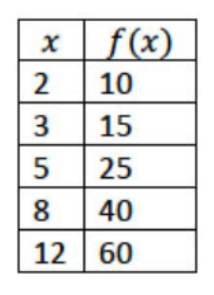

In [13]:
## Lagrange interpolation polynomial
def lagrange_interpolation_polynomial(x_data, y_data):
    """
    Computes the Lagrange interpolation polynomial for the given data points.
    """
    x = sp.symbols('x')
    lagrange_polynomial = 0

    print('Langrange Basis Polynomials')
    for i in range(len(x_data)):
        L_i = 1
        for j in range(len(x_data)):
            if j != i:
                L_i *= (x - x_data[j]) / (x_data[i] - x_data[j])

        # Add the contribution of each term to the polynomial
        lagrange_polynomial += y_data[i] * L_i

        # Print the Lagrange basis polynomial for degree i
        print(f"L_{i}(x) = ", sp.simplify(L_i))

    # Simplify the polynomial expression
    return sp.simplify(lagrange_polynomial)

## Get the lagrange interpolation polynomial equation
def lagrange_interpolation_polynomial_equation(x_data, y_data):
    """
    Returns the equation of the Lagrange interpolation polynomial.
    """
    lagrange_polynomial = lagrange_interpolation_polynomial(x_data, y_data)
    print(f'Final Lagrange Interpolation Polynomial: ', lagrange_polynomial)
    return lagrange_polynomial

## Get the polynomial value at specific point
def evaluate_polynomial_at_point(x_data, y_data, x_point):
    """
    Evaluates the Lagrange interpolation polynomial at a specific point x_point.
    """
    lagrange_polynomial = lagrange_interpolation_polynomial(x_data, y_data)
    f_lagrange = sp.lambdify(sp.symbols('x'), lagrange_polynomial, 'numpy')
    return f_lagrange(x_point)

x= [2,3,5,8,12]
y= [10,15,25,40,60]

print('P(4): ',evaluate_polynomial_at_point(x,y,4))

Langrange Basis Polynomials
L_0(x) =  (x - 12)*(x - 8)*(x - 5)*(x - 3)/180
L_1(x) =  -(x - 12)*(x - 8)*(x - 5)*(x - 2)/90
L_2(x) =  (x - 12)*(x - 8)*(x - 3)*(x - 2)/126
L_3(x) =  -(x - 12)*(x - 5)*(x - 3)*(x - 2)/360
L_4(x) =  (x - 8)*(x - 5)*(x - 3)*(x - 2)/2520
P(4):  20


## Question 2
Newton’s divided difference second-order polynomial for the data below is given by
f(x) =b0 +b1(x-15) + b2(x-15)*(x-18). Find b1.

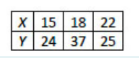


In [14]:
## Divided difference table
def divided_difference_table(x, y):
    """
    Function to construct the divided difference table.

    Parameters:
    ----------------
    :param x: List of x-coordinates (input data).
    :param y: List of y-coordinates (output data corresponding to x).

    :return: A table of divided differences.
    """
    n = len(x)
    table = np.zeros([n, n])
    table[:, 0] = y  # The first column is just the y-values

    # Fill the divided difference table
    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (x[i + j] - x[i])

    return table

## Newton Divided Difference
def newton_polynomial(x, y):
    """
    Generate the Newton interpolation polynomial as a sympy expression.

    Parameters:
    ----------------
    :param x: List of x-coordinates (input data).
    :param y: List of y-coordinates (output data corresponding to x).

    :return: The Newton interpolation polynomial as a sympy expression.
    """
    n = len(x)
    table = divided_difference_table(x, y)

    # Define symbolic variable
    X = sp.symbols('X')

    # Start the polynomial with the first divided difference
    polynomial = table[0][0]
    print(f"Order 1 Polynomial: {polynomial}")


    # Construct the polynomial in Newton form
    for i in range(1, n):
        term = table[0][i]
        for j in range(i):
            term *= (X - x[j])
        polynomial += term

        # Print the polynomial after adding each term (divided difference order)
        print(f"Order {i+1} Polynomial: {sp.simplify(polynomial)}")

    return polynomial

## Get the newton polynomial equation
def get_newton_polynomial_equation(x, y):
    """
    Get the equation of the Newton interpolation polynomial.
    """
    polynomial = newton_polynomial(x, y)
    # Simplify the expression for cleaner output
    polynomial = sp.simplify(polynomial)
    return polynomial

## Get the polynomial value at specific point
def get_newton_polynomial_value(x, y, value):
    """
    Function to calculate the Newton interpolation polynomial using divided differences.

    Parameters:
    ----------------
    :param x: List of x-coordinates (input data).
    :param y: List of y-coordinates (output data corresponding to x).
    :param value: The value of x for which to evaluate the polynomial.

    :return: The value of the polynomial at `value`.
    """
    n = len(x)
    table = divided_difference_table(x, y)

    # The Newton polynomial
    result = table[0, 0]
    product = 1

    for i in range(1, n):
        product *= (value - x[i - 1])
        result += table[0, i] * product

    return result


x=[15, 18, 22]
y=[24, 37, 25]

get_newton_polynomial_equation(x, y)

Order 1 Polynomial: 24.0
Order 2 Polynomial: 4.33333333333333*X - 41.0
Order 3 Polynomial: -1.04761904761905*X**2 + 38.9047619047619*X - 323.857142857143


-1.04761904761905*X**2 + 38.9047619047619*X - 323.857142857143

## Question 3
Find the linear equation of the Least Square Methods that fits the following data (0,6), (1,0), (2,0)

Least Squares Linear Approximation: y = -3.0000x + 5.0000


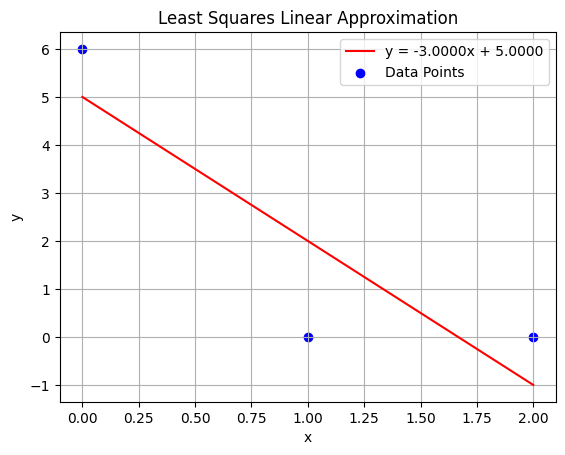

In [15]:
def least_square_approximation(x_data, y_data):
    """
    Compute the least squares linear approximation.

    Parameters:
    ----------------
    :param x_data: List of x-coordinates.
    :param y_data: List of y-coordinates.

    :return: Tuple (m, c) for the line equation y = mx + c.
    """
    n = len(x_data)
    sum_x = sum(x_data)
    sum_y = sum(y_data)
    sum_xy = sum(x * y for x, y in zip(x_data, y_data))
    sum_x2 = sum(x ** 2 for x in x_data)

    # Calculate m and c
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    c = (sum_y - m * sum_x) / n

    print(f"Least Squares Linear Approximation: y = {m:.4f}x + {c:.4f}")
    return m, c

def plot_least_square_approximation(x_data, y_data, m, c):
    """
    Plot the least squares linear approximation and data points.

    Parameters:
    ----------------
    :param x_data: List of x-coordinates.
    :param y_data: List of y-coordinates.
    :param m: Slope of the least squares line.
    :param c: Intercept of the least squares line.
    """
    # Generate x values for the line
    x_vals = np.linspace(min(x_data), max(x_data), 100)
    y_vals = m * x_vals + c

    # Plot the line
    plt.plot(x_vals, y_vals, color='r', label=f"y = {m:.4f}x + {c:.4f}")

    # Plot the data points
    plt.scatter(x_data, y_data, color='b', label="Data Points")

    # Add labels and legend
    plt.title("Least Squares Linear Approximation")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()


# Create data
x = [0,1,2]
y = [6,0,0]

# Get the least squares linear approximation
m, c = least_square_approximation(x, y)

# Plot the least squares line and the data points
plot_least_square_approximation(x, y, m, c)

## Question 5

In [16]:
## Divided difference table
def divided_difference_table(x, y):
    """
    Function to construct the divided difference table.

    Parameters:
    ----------------
    :param x: List of x-coordinates (input data).
    :param y: List of y-coordinates (output data corresponding to x).

    :return: A table of divided differences.
    """
    n = len(x)
    table = np.zeros([n, n])
    table[:, 0] = y  # The first column is just the y-values

    # Fill the divided difference table
    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (x[i + j] - x[i])

    return table

## Newton Divided Difference
def newton_polynomial(x, y):
    """
    Generate the Newton interpolation polynomial as a sympy expression.

    Parameters:
    ----------------
    :param x: List of x-coordinates (input data).
    :param y: List of y-coordinates (output data corresponding to x).

    :return: The Newton interpolation polynomial as a sympy expression.
    """
    n = len(x)
    table = divided_difference_table(x, y)

    # Define symbolic variable
    X = sp.symbols('X')

    # Start the polynomial with the first divided difference
    polynomial = table[0][0]
    print(f"Order 1 Polynomial: {polynomial}")


    # Construct the polynomial in Newton form
    for i in range(1, n):
        term = table[0][i]
        for j in range(i):
            term *= (X - x[j])
        polynomial += term

        # Print the polynomial after adding each term (divided difference order)
        print(f"Order {i+1} Polynomial: {sp.simplify(polynomial)}")

    return polynomial

## Get the newton polynomial equation
def get_newton_polynomial_equation(x, y):
    """
    Get the equation of the Newton interpolation polynomial.
    """
    polynomial = newton_polynomial(x, y)
    # Simplify the expression for cleaner output
    polynomial = sp.simplify(polynomial)
    return polynomial

## Get the polynomial value at specific point
def get_newton_polynomial_value(x, y, value):
    """
    Function to calculate the Newton interpolation polynomial using divided differences.

    Parameters:
    ----------------
    :param x: List of x-coordinates (input data).
    :param y: List of y-coordinates (output data corresponding to x).
    :param value: The value of x for which to evaluate the polynomial.

    :return: The value of the polynomial at `value`.
    """
    n = len(x)
    table = divided_difference_table(x, y)

    # The Newton polynomial
    result = table[0, 0]
    product = 1

    for i in range(1, n):
        product *= (value - x[i - 1])
        result += table[0, i] * product

    return result


x=[4,6,8,10]
y=[1,3,8,16]

get_newton_polynomial_value(x,y,5)

1.625